Dataset shape: (1797, 64)
Number of images: 1797
Label distribution: [178 182 177 183 181 182 181 179 174 180]


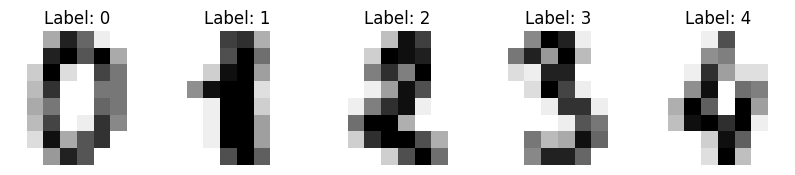

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
digits = load_digits()

# Display dataset information
print(f"Dataset shape: {digits.data.shape}")
print(f"Number of images: {len(digits.images)}")
print(f"Label distribution: {np.bincount(digits.target)}")

# Visualize some sample images
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title(f"Label: {label}")
plt.show()


In [2]:
# Flatten the images
X = digits.images.reshape(len(digits.images), -1)
y = digits.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [3]:
# Initialize and train the model
clf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [4]:
# Predict on test data
y_pred = clf.predict(X_test)

# Compute accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.9711
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.97      1.00      0.99        37
           2       1.00      1.00      1.00        38
           3       0.96      0.93      0.95        46
           4       0.98      1.00      0.99        55
           5       0.94      0.98      0.96        59
           6       0.98      0.98      0.98        45
           7       0.98      0.98      0.98        41
           8       0.95      0.95      0.95        38
           9       0.98      0.92      0.95        48

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



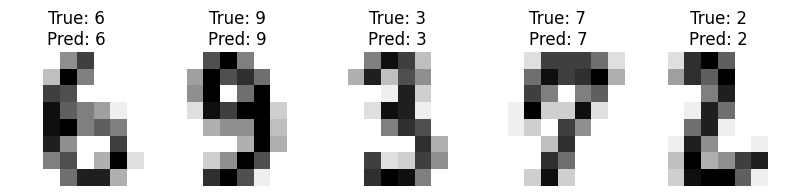

In [5]:
# Select some test images
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for ax, image, true_label, pred_label in zip(axes, X_test.reshape(-1, 8, 8)[:5], y_test[:5], y_pred[:5]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title(f"True: {true_label}\nPred: {pred_label}")
plt.show()


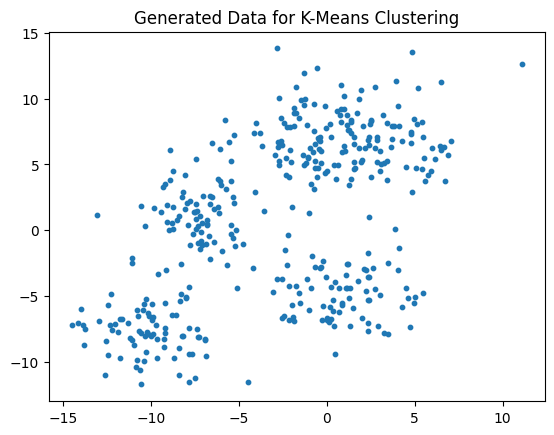

In [6]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic dataset
X, _ = make_blobs(n_samples=400, n_features=2, centers=5, cluster_std=2.0, random_state=100)

# Scatter plot the data
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Generated Data for K-Means Clustering")
plt.show()


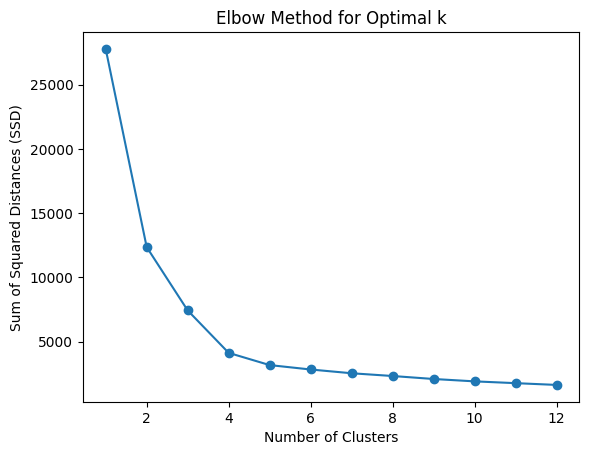

In [7]:
ssd = []
k_range = range(1, 13)

# Compute SSD for different cluster numbers
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=100, n_init=10)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)

# Plot SSD values
plt.plot(k_range, ssd, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Distances (SSD)")
plt.title("Elbow Method for Optimal k")
plt.show()


In [8]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load dataset
faces = fetch_olivetti_faces()
X = faces.images
y = faces.target

# Normalize pixel values
X = X / 1.0

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for the model
X_train = X_train.reshape(-1, 64, 64, 1)
X_test = X_test.reshape(-1, 64, 64, 1)


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [9]:
# Define the model
model = keras.Sequential([
    layers.Flatten(input_shape=(64, 64, 1)),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dense(40, activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - accuracy: 0.0206 - loss: 4.4804 - val_accuracy: 0.0250 - val_loss: 3.7301
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.0249 - loss: 3.7436 - val_accuracy: 0.0250 - val_loss: 3.7272
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.0349 - loss: 3.6775 - val_accuracy: 0.0250 - val_loss: 3.7067
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0216 - loss: 3.6807 - val_accuracy: 0.0250 - val_loss: 3.7047
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0274 - loss: 3.6569 - val_accuracy: 0.0250 - val_loss: 3.7251
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0299 - loss: 3.6643 - val_accuracy: 0.0250 - val_loss: 3.6858
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0180 - loss: 3.6683 - val_accuracy: 0.0000e+00 - val_loss: 3.6933
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0240 - loss: 3.6588 - val_accuracy: 0.0125

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0180 - loss: 3.6264
Test Accuracy: 0.0125


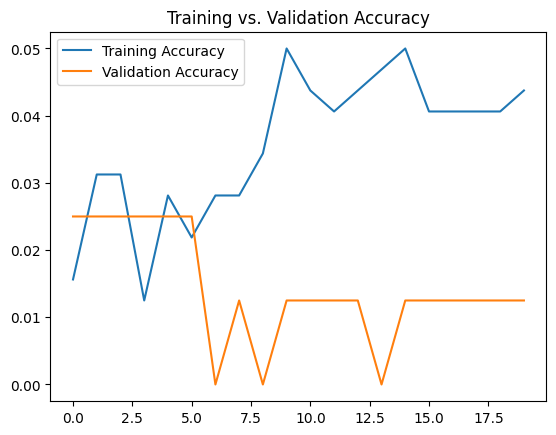

In [11]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.legend()
plt.title("Training vs. Validation Accuracy")
plt.show()


In [12]:
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape for CNN
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
# Build the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Train the CNN model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.9114 - loss: 0.2912 - val_accuracy: 0.9868 - val_loss: 0.0402
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9869 - loss: 0.0444 - val_accuracy: 0.9865 - val_loss: 0.0416
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9908 - loss: 0.0300 - val_accuracy: 0.9884 - val_loss: 0.0338
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9929 - loss: 0.0221 - val_accuracy: 0.9912 - val_loss: 0.0281
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - accuracy: 0.9960 - loss: 0.0133 - val_accuracy: 0.9892 - val_loss: 0.0312
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9966 - loss: 0.0109 - val_accuracy: 0.9875 - val_loss: 0.0399
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 31ms/step - accuracy: 0.9972 - loss: 0.0088 - val_accuracy: 0.9906 - val_loss: 0.0333
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - accuracy: 0.9979 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9904 - loss: 0.0435
Test Accuracy: 0.9928


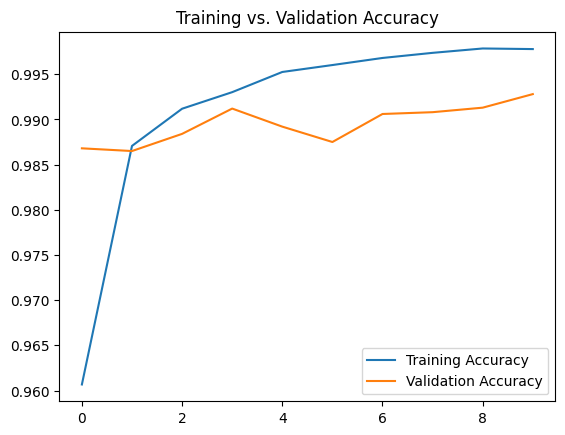

In [15]:
# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.legend()
plt.title("Training vs. Validation Accuracy")
plt.show()
